**==== DETACHED PROBLEM RECOG ====**

In [2]:
import matplotlib.pyplot as plt
import numpy
import math

def div_sp(u, s):
    dm  = u**3 *w[s+3] + u**2*(1-u) *w[s+2] + u*(1-u)**2 *w[s+1] + (1-u)**3 *w[s]
    dml = numpy.floor(numpy.log2(dm))
    ipu = (dm/2**dml) -1
    #yl  = 1/((1-ipu) *2**dml + ipu *2**(dml+1)) <- p. idealny = (1 + ipu) *2*dml
    yl = (1-ipu)/2**dml + ipu/2**(dml+1)
    #yl = 1/2**dml <- test
    
    return yl

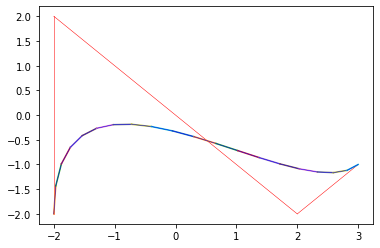

In [3]:
## Wstępna ewaluacja punktów krzywej Beziera

# P = numpy.asarray([[-2, -2],[2, -2],[-2, 2],[-1, 3]]) #,[10, 10],[9, 0],[8, 1]])
# w = numpy.asarray([4,3*64,3*4,32])
P = numpy.asarray([[-2, -2],[-2, 2],[2, -2],[3, -1]]) #,[10, 10],[9, 0],[8, 1]])
w = numpy.asarray([4,3*4,3*4,4])


# P = numpy.asarray([[-1, 1],[-1, -1],[1, -1],[1, 1]])
# w = numpy.asarray([1,3*1,3*1,1])


for n in range(1, len(P)):
    plt.plot([P[n-1][0], P[n][0]], [P[n-1][1], P[n][1]], color='red', lw=.5)

N = 20
domain = numpy.linspace(0, 1, N) # u
#domain = (numpy.polynomial.chebyshev.chebpts1(20)+1)/2
s = 0
u = 0
prev =    u**3 *P[s+3]*w[s+3] + u**2*(1-u) *P[s+2]*w[s+2] + u*(1-u)**2 *P[s+1]*w[s+1] + (1-u)**3 *P[s]*w[s]
prevp = prev/(u**3 *w[s+3] + u**2*(1-u) *w[s+2] + u*(1-u)**2 *w[s+1] + (1-u)**3 *w[s])
prevs = prevp

xstep = [None]*N
xval  = [None]*N # xval
ystep = [None]*N
yval  = [None]*N # yval

for n in range(N): 
    u = domain[n]
    
    nxt =    u**3 *P[s+3]*w[s+3] + u**2*(1-u) *P[s+2]*w[s+2] + u*(1-u)**2 *P[s+1]*w[s+1] + (1-u)**3 *P[s]*w[s]
    nxtp = nxt/(u**3 *w[s+3] + u**2*(1-u) *w[s+2] + u*(1-u)**2 *w[s+1] + (1-u)**3 *w[s])
    nxts = nxt*div_sp(u, s)
    
    plt.plot([prevp[0], nxtp[0]], [prevp[1], nxtp[1]])
    plt.plot([prevs[0], nxts[0]], [prevs[1], nxts[1]], color='blue', lw=.5)
    
    xstep[n] = (nxtp[0]-prevp[0])
    xval[n] = nxtp[0]
    ystep[n] = (nxtp[1]-prevp[1])
    yval[n] = nxtp[1]
        
    prevp=nxtp
    prevs=nxts
    
# s = 3
# u = 0
# prev =    u**3 *P[s+3]*w[s+3] + u**2*(1-u) *P[s+2]*w[s+2] + u*(1-u)**2 *P[s+1]*w[s+1] + (1-u)**3 *P[s]*w[s]
# prev = prev/(u**3 *w[s+3]        + u**2*(1-u) *w[s+2]        + u*(1-u)**2 *w[s+1]        + (1-u)**3 *w[s])
# for u in numpy.linspace(0, 1, 100):
#     nxt =    u**3 *P[s+3]*w[s+3] + u**2*(1-u) *P[s+2]*w[s+2] + u*(1-u)**2 *P[s+1]*w[s+1] + (1-u)**3 *P[s]*w[s]
#     nxt *=1/(u**3 *w[s+3]        + u**2*(1-u) *w[s+2]        + u*(1-u)**2 *w[s+1]        + (1-u)**3 *w[s])
#     plt.plot([prev[0], nxt[0]], [prev[1], nxt[1]], color='black')
#     prev=nxt


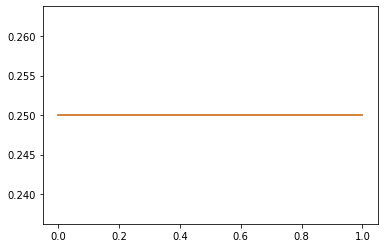

In [4]:
## Jakość sposobu określania denominatora (~(w, u))
x = numpy.linspace(0, 1, 100)
y = [None]*len(x)
for n in range(len(x)):
    u = x[n]
    y[n] = numpy.asarray([
        1/(u**3 *w[s+3] + u**2*(1-u) *w[s+2] + u*(1-u)**2 *w[s+1] + (1-u)**3 *w[s]),
        div_sp(u, s)
    ])
    
plt.plot(x, y)

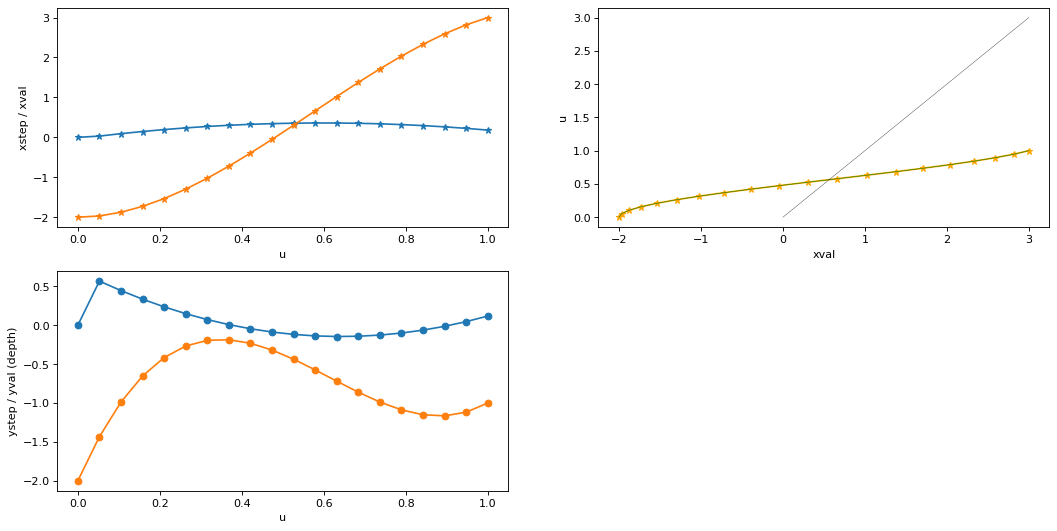

In [5]:
## Pomiar przesunięć punktów rzutu
fig=plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plt.ylabel('xstep / xval')
plt.xlabel('u')
plt.plot(domain, numpy.asarray([[xstep[n], xval[n]] for n in range(len(xstep))]), marker='*')

plt.subplot(2, 2, 2)
plt.ylabel('u')
plt.xlabel('xval')
plt.plot(xval, domain, c='orange', marker='*')
plt.plot()
#plt.plot(xval, yval)
#plt.plot(numpy.asarray([numpy.max(xval[0:n+1]) for n in range(len(xval))]), domain)
#plt.plot(domain, numpy.asarray([1/xval[n] if xval[n]!= 0 else 1 for n in range(len(xval))]))

# v- aby nie rozczepiać dziedziny płat musi być wypukły
xcrops = 0
xcrope = len(xval)
for n in range(1, len(xval)):
    if xstep[n]*xstep[n-1] <0:
        if yval[n] < yval[n-1]: # <- ywal - im mniej tym blizej
            xcrops = n
        else:
            xcrope = n
plt.plot(xval[xcrops:xcrope], domain[xcrops:xcrope], lw=.5, c='g')
plt.plot([0, numpy.max(xval)], [0, numpy.max(xval)], lw=.3, c='black')
    
plt.subplot(2, 2, 3)
plt.ylabel('ystep / yval (depth)')
plt.xlabel('u')
plt.plot(domain, numpy.asarray([[ystep[n], yval[n]] for n in range(len(ystep))]), marker='o')




**==== RASTER-SAMPLING - WEIGHTED 4CP LINE ====**

* U(u)  = [u^3,   u^2,   u^1,   u^0].T
* Xd = [x3, x2, x1, x0]
* Yd = [y3, y2, y1, y0]
* Wd = [w3, w2, w1, w0]
* X = X(Xd, Wd)
* Y = Y(Yd, Wd)
* D = D(Wd)
* f(u) = X @ U /(D @ U)
* inv{f(xi)} = {u : X(Xd-(I*xi), Wd) @ U = 0 && (Y @ U /(D @ U) - min}

cp0_x_shift 0.21650635094610968
dmaxx 2.9990118577075098
dmin 0.9999999999999999
dmax 62.78405811673861
dudx2[0] 0.0
41.237604307036634


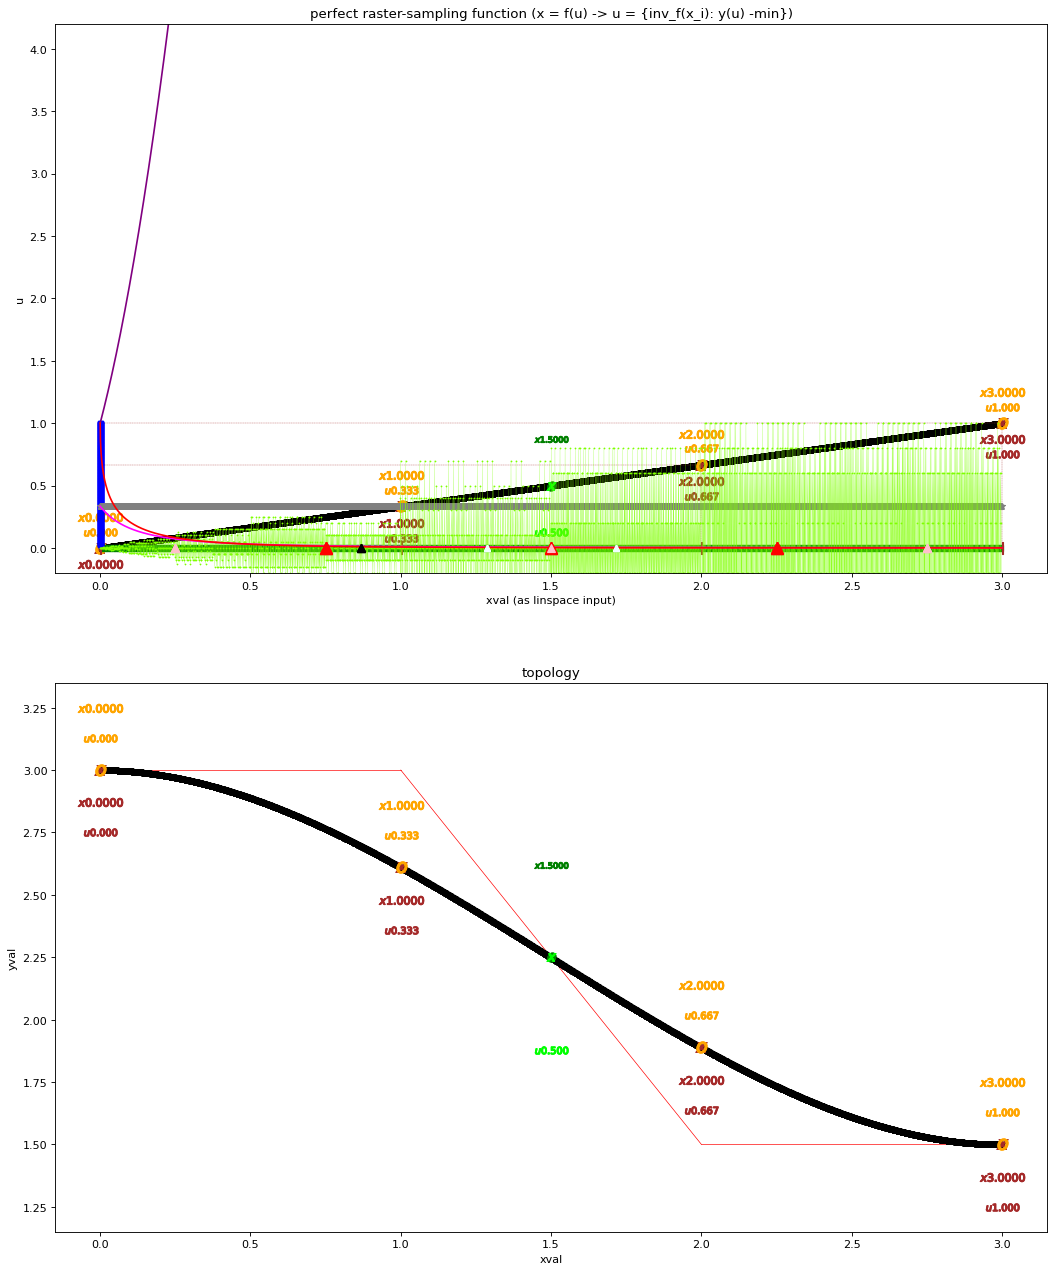

In [6]:
import matplotlib.pyplot as plt
import numpy
import math

class cP:
    def __init__(self, relative_sin, relative_cos, radius_ratio, weight_exp2):
        self.rsin = relative_sin
        self.rcos = relative_cos
        self.rr   = radius_ratio
        self.we   = weight_exp2
        
class ccP:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def go(cd, rfr, S, rotangle=0):
    plt.figure(figsize=(16, 20), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2, 1, 2)
    # a = numpy.linspace(0, 2*math.pi, 200)
    # plt.plot(numpy.cos(a)*rfr, numpy.sin(a)*rfr, c='r', lw=.3)

    ## INIT
    n=0

    # rotation
    rotsin = math.sin(rotangle)
    rotcos = math.cos(rotangle)

    # carthesian coordinates
    cc = numpy.asarray([
        ccP(rfr*cd[n+3].rr*cd[n+3].rcos, rfr*cd[n+3].rr*cd[n+3].rsin),
        ccP(rfr*cd[n+2].rr*cd[n+2].rcos, rfr*cd[n+2].rr*cd[n+2].rsin),
        ccP(rfr*cd[n+1].rr*cd[n+1].rcos, rfr*cd[n+1].rr*cd[n+1].rsin),
        ccP(rfr*cd[n+0].rr*cd[n+0].rcos, rfr*cd[n+0].rr*cd[n+0].rsin)
    ][::-1]) 
    # rotation
    cc = numpy.asarray([ccP(cc[n].x*rotcos - cc[n].y*rotsin, cc[n].x*rotsin + cc[n].y*rotcos) for n in range(4)])

    # carthesian coordinates for spreaded nurbs
    ccs = [None]*4
    ccs[0] = ccP(cc[0].x,                        cc[0].y)
    ccs[1] = ccP(ccs[0].x +abs(cc[1].x-cc[0].x), ccs[0].y +abs(cc[1].y-cc[0].y))
    ccs[2] = ccP(ccs[1].x +abs(cc[2].x-cc[1].x), ccs[1].y +abs(cc[2].y-cc[1].y))
    ccs[3] = ccP(ccs[2].x +abs(cc[3].x-cc[2].x), ccs[2].y +abs(cc[3].y-cc[2].y))
    
#     for ix in range(0, len(cc)):
#         plt.plot([0, cc[ix].x], [0,cc[ix].x], c='red', lw=.3, marker='*')
    for ix in range(1, len(cc)):
        plt.plot([cc[ix-1].x, cc[ix].x], [cc[ix-1].y, cc[ix].y], c='r', lw=.6)
    #plt.plot([cc[0].x, cc[3].x, [cc[0].y, cc[3].y], c='blue', lw=.4)

    X   = numpy.asarray([ 1, 0, 0, 0]) *2**cd[n+3].we *cc[n+3].x \
        + numpy.asarray([-1, 1, 0, 0]) *2**cd[n+2].we *cc[n+2].x \
        + numpy.asarray([ 1,-2, 1, 0]) *2**cd[n+1].we *cc[n+1].x \
        + numpy.asarray([-1, 3,-3, 1]) *2**cd[n+0].we *cc[n+0].x 
    Y   = numpy.asarray([ 1, 0, 0, 0]) *2**cd[n+3].we *cc[n+3].y \
        + numpy.asarray([-1, 1, 0, 0]) *2**cd[n+2].we *cc[n+2].y \
        + numpy.asarray([ 1,-2, 1, 0]) *2**cd[n+1].we *cc[n+1].y \
        + numpy.asarray([-1, 3,-3, 1]) *2**cd[n+0].we *cc[n+0].y
    D   = numpy.asarray([ 1, 0, 0, 0]) *2**cd[n+3].we \
        + numpy.asarray([-1, 1, 0, 0]) *2**cd[n+2].we \
        + numpy.asarray([ 1,-2, 1, 0]) *2**cd[n+1].we \
        + numpy.asarray([-1, 3,-3, 1]) *2**cd[n+0].we 
    
#     Xs  = numpy.asarray([ 1, 0, 0, 0]) *2**cd[n+3].we *ccs[n+3].x \
#         + numpy.asarray([-1, 1, 0, 0]) *2**cd[n+2].we *ccs[n+2].x \
#         + numpy.asarray([ 1,-2, 1, 0]) *2**cd[n+1].we *ccs[n+1].x \
#         + numpy.asarray([-1, 3,-3, 1]) *2**cd[n+0].we *ccs[n+0].x
#     Ys  = numpy.asarray([ 1, 0, 0, 0]) *2**cd[n+3].we *ccs[n+3].y \
#         + numpy.asarray([-1, 1, 0, 0]) *2**cd[n+2].we *ccs[n+2].y \
#         + numpy.asarray([ 1,-2, 1, 0]) *2**cd[n+1].we *ccs[n+1].y \
#         + numpy.asarray([-1, 3,-3, 1]) *2**cd[n+0].we *ccs[n+0].y

    ## EXEC
    bnd   = numpy.linspace(0, 1, S)
    xval  = numpy.asarray([None]*S)
    yval  = numpy.asarray([None]*S)
#     xsval = numpy.asarray([None]*S)
#     ysval = numpy.asarray([None]*S)

    for ix in range(S):
        u = bnd[ix]
        # [[u**3], [u**2], [u] ,[1]]
        U = numpy.asarray([[u,0],[1,0],[0,u],[0,1]]) @ numpy.asarray([[u,0],[0,1]]) @ numpy.asarray([[u],[1]])

        x  = (X  @ U / (D @ U))[0]
        y  = (Y  @ U / (D @ U))[0]
#         xs = (Xs @ U / (D @ U))[0]
#         ys = (Ys @ U / (D @ U))[0]

        xval [ix] = x
        yval [ix] = y
#         xsval[ix] = xs
#         ysval[ix] = ys

    plt.plot(xval, yval, lw=.8, c='black', marker='*')

    # szukanie punktów najbliższych punktom kontrolnym (BRĄZ)
    for ix in range(4):
        nx = numpy.argsort(numpy.abs(xval - cc[ix].x))[0]
        x = xval[nx]
        y = yval[nx]
        plt.plot([x]*2, [y]*2,      ls='', marker='$x$',                       ms=10, c='brown')
        plt.plot([x]*2, [y -.13]*2, ls='', marker='$x{:.4f}$'.format(x),       ms=40, c='brown')
        plt.plot([x]*2, [y -.25]*2, ls='', marker='$u{:.3f}$'.format(bnd[nx]), ms=30, c='brown')

    # szukanie położeń zależnych punktów kontrolnych w przypadku równych wag (POMARAŃCZ)
    for u in numpy.linspace(0, 1, 4):
        U = numpy.asarray([[u,0],[1,0],[0,u],[0,1]]) @ numpy.asarray([[u,0],[0,1]]) @ numpy.asarray([[u],[1]])

        x = (X @ U / (D @ U))[0]
        y = (Y @ U / (D @ U))[0]

        plt.plot([x]*2, [y]*2,      ls='', marker='$o$',                 ms=10, c='orange')
        plt.plot([x]*2, [y +.25]*2, ls='', marker='$x{:.4f}$'.format(x), ms=40, c='orange')
        plt.plot([x]*2, [y +.13]*2, ls='', marker='$u{:.3f}$'.format(u), ms=30, c='orange')

    # szukanie jw tylko ze środkiem (ZIELEŃ)
    for u in [.5]:
        U = numpy.asarray([[u,0],[1,0],[0,u],[0,1]]) @ numpy.asarray([[u,0],[0,1]]) @ numpy.asarray([[u],[1]])
        x = (X @ U / (D @ U))[0]
        y = (Y @ U / (D @ U))[0] 
        plt.plot([x]*2, [y]*2,      ls='', marker='$o$',                 ms=8,  c='green')
        plt.plot([x]*2, [y +.37]*2, ls='', marker='$x{:.4f}$'.format(x), ms=30, c='green')

        x_med = cc[3].x*2**cd[3].we + cc[2].x*2**cd[2].we + cc[1].x*2**cd[1].we + cc[0].x*2**cd[0].we
        x_med /= 2**cd[3].we + 2**cd[2].we + 2**cd[1].we + 2**cd[0].we
        nx = numpy.argsort(numpy.abs(xval - x_med))[0]
        x = xval[nx]
        y = yval[nx]
        plt.plot([x]*2, [y]*2,      ls='', marker='$x$',                       ms=8,  c='lime')
        plt.plot([x]*2, [y -.37]*2, ls='', marker='$u{:.3f}$'.format(bnd[nx]), ms=30, c='lime')

    plt.title('topology')
    plt.xlabel('xval')
    plt.ylabel('yval')


    plt.subplot(2, 1, 1)
    plt.title('perfect raster-sampling function (x = f(u) -> u = {inv_f(x_i): y(u) -min})')
    plt.plot(xval, bnd, marker='*', c='black')
    plt.xlabel('xval (as linspace input)')
    plt.ylabel('u')
    
    cpcix = [None] *4
    for ix in range(4):
        nx = numpy.argsort(numpy.abs(xval - cc[ix].x))[0]
        cpcix[ix] = nx
        
        x = xval[nx]
        y = yval[nx]
        
        plt.plot([x]*2,        [bnd[nx]]*2,      ls='',   marker='$x$',                       ms=10, c='brown')
        plt.plot([x]*2,        [bnd[nx] -.13]*2, ls='',   marker='$x{:.4f}$'.format(x),       ms=40, c='brown')
        plt.plot([x]*2,        [bnd[nx] -.25]*2, ls='',   marker='$u{:.3f}$'.format(bnd[nx]), ms=30, c='brown')
        plt.plot([x]*2,        [0, bnd[nx]],     ls='--',                                     lw=.3, c='brown')
        plt.plot([xval[0], x], [bnd[nx]]*2,      ls='--',                                     lw=.3, c='brown')

    pvcix = [None] *4
    for ix in range(4):
        u = numpy.linspace(0, 1, 4)[ix]
        nx = numpy.argsort(numpy.abs(bnd - u))[0]
        pvcix[ix] = nx
        
        U = numpy.asarray([[u,0],[1,0],[0,u],[0,1]]) @ numpy.asarray([[u,0],[0,1]]) @ numpy.asarray([[u],[1]])

        x = (X @ U / (D @ U))[0]
        y = (Y @ U / (D @ U))[0]

        plt.plot([x]*2, [u]*2,      ls='', marker='$o$',                 ms=10, c='orange')
        plt.plot([x]*2, [u +.25]*2, ls='', marker='$x{:.4f}$'.format(x), ms=40, c='orange')
        plt.plot([x]*2, [u +.13]*2, ls='', marker='$u{:.3f}$'.format(u), ms=30, c='orange')

    for u in [.5]:
        U = numpy.asarray([[u,0],[1,0],[0,u],[0,1]]) @ numpy.asarray([[u,0],[0,1]]) @ numpy.asarray([[u],[1]])
        x = (X @ U / (D @ U))[0]
        y = (Y @ U / (D @ U))[0] 
        plt.plot([x]*2, [u]*2,      ls='', marker='$o$',                 ms=8,  c='green')
        plt.plot([x]*2, [u +.37]*2, ls='', marker='$x{:.4f}$'.format(x), ms=30, c='green')

        x_med = cc[3].x*2**cd[3].we + cc[2].x*2**cd[2].we + cc[1].x*2**cd[1].we + cc[0].x*2**cd[0].we
        x_med /= 2**cd[3].we + 2**cd[2].we + 2**cd[1].we + 2**cd[0].we
        nx = numpy.argsort(numpy.abs(xval - x_med) - numpy.min(numpy.abs(xval - x_med)))[0]
        x = xval[nx]
        y = yval[nx]
        plt.plot([x]*2, [u]*2,      ls='', marker='$x$',                       ms=8,  c='lime')
        plt.plot([x]*2, [u -.37]*2, ls='', marker='$u{:.3f}$'.format(bnd[nx]), ms=30, c='lime')
        
    plt.plot(xval, [0]*len(bnd), marker='$|$', c='g')
    for nx in cpcix:
        x_ = xval[nx]
        plt.plot(x_, [0], marker='$|$', c='brown', ms=10)
        
    plt.plot([xval[0]]*len(bnd), bnd, marker='$-$', c='b')
    
    dudx = numpy.asarray([(bnd[ix+1]-bnd[ix])/(xval[ix+1]-xval[ix]) for ix in range(S-1)])
#     dudx = dudx / numpy.max(numpy.abs(dudx))
    plt.plot(xval[:-1], dudx, lw=.4, marker='*', c='gray')
    
    dudx2 = numpy.asarray([(dudx[ix+1]-dudx[ix])/(xval[ix+1]-xval[ix]) for ix in range(S-2)])
#     plt.plot(xval[:-2], dudx2, lw=.2, marker='*', c='chartreuse', ms=1)
    plt.plot(xval[:-2], dudx2/numpy.max(numpy.abs(dudx2)), lw=.2, marker='*', c='chartreuse', ms=1)

    
    ## CP distances
    cp01_distance = cc[1].x - cc[0].x
    
    ## u=0 derivatives vals of inverse simplified nurbs (cp0, cp1)
    u0_isn2_dudx1 = 2**(cd[0].we-cd[1].we)                        /cp01_distance # 1st derivative (invf statement)
    u0_isn2_dudx2 = 2* (2**cd[1].we - 2**cd[0].we) /(2**cd[1].we) /cp01_distance # 2nd derivative 

    ## CP0 approx data for formula: lf/(x0-xs) (x_shift0: u(x_shift0)=0)
#     cp0_rXv_rvsub         = cc[0].x                            # raw_X_vec relativization to cp0 subtrahend
#     cp0_x_shift           = u0_isn2_dudx1    /(-u0_isn2_dudx2) # x_shift for cp0 approx
#     cp0_linfactor         = u0_isn2_dudx1**2 /(-u0_isn2_dudx2) # linear factor in x=x_shift

    ## CP0 approx data for formula: lf/(x0-xs)**2 (x_shift0: u(x_shift0)=0)
    cp0_rXv_rvsub         = cc[0].x                            # raw_X_vec relativization to cp0 subtrahend
    cp0_x_shift           = (1/2)* (u0_isn2_dudx1/(-u0_isn2_dudx2)**2)**(1/2)
    cp0_linfactor         = (1/4)* (u0_isn2_dudx1/(-u0_isn2_dudx2))**2 # linear factor in x=x_shift

    def invf(raw_X_vec, invfinfoshown=False):  
        op  = numpy.zeros((len(raw_X_vec)))
        
#         x0  = X_vec-cc[0].x            # cp relative x
#         d01 =     cc[1].x-cc[0].x    # cp-cp distance
#         e01 = 2**(cd[0].we-cd[1].we) # exponential ratio
#         w01 =     cd[0].we-cd[1].we  # exponential ratio log2
#         c01 = (cc[0].x*2**cd[0].we + cc[1].x*2**cd[1].we)/(2**cd[0].we+2**cd[1].we) # exweightd med
        
#         x_shift = 1/(e01/d01)
#         x_stretch = 2**(3 + (w01-3)/8 + (w01-3)/20)

#         crct1 = (cd[0].we/4)
        cp0_X_vec = raw_X_vec - cp0_rXv_rvsub # X_vec data relative to cp0 carthesian x 
        op += cp0_linfactor/(cp0_X_vec*(1) +cp0_x_shift)**2
        
#         *(1/cp0_x_shift)

#         op += 1/(x0 *x_stretch + x_shift) # to jest ok ale może być lepiej
#         op += 1/(x0 *(e01/d01) + x_shift)
#         op += 1/(x0 *(e01/d01) +0**(1/2))**(1) *numpy.exp(-(x0/c01)) *(x0/c01) *e01*(0.11595703125)*(numpy.e)# to jest lepsze?
#         op += numpy.exp(-(x0/c01)) *d01/c01 *(0.11595703125)*numpy.e# to jest lepsze?
#         op += 1/(x0 *(e01/d01))
#         op += 1/(x0 *(e01/d01) +x_shift) *(0 +(numpy.exp(-(x0/c01)**.5) *(x0/c01)**.5 *2**.5 *e01*(0.11595703125)*(numpy.e/2)**2))
#         xd = numpy.exp(1/(e01/d01)**(1/2)) -1
#         op += 1/numpy.log(x0*e01 +1 + xd)**2
        if invfinfoshown:
#             print('x_shift', x_shift)
            print('cp0_x_shift', cp0_x_shift)
#             print('a', a)
#             print('d', d)
        
        c01 = (cc[0].x*2**cd[0].we + cc[1].x*2**cd[1].we)/(2**cd[0].we+2**cd[1].we) # exweightd med
        c12 = (cc[1].x*2**cd[1].we + cc[2].x*2**cd[2].we)/(2**cd[1].we+2**cd[2].we)
        c23 = (cc[2].x*2**cd[2].we + cc[3].x*2**cd[3].we)/(2**cd[2].we+2**cd[3].we)
        plt.plot([c01, c12, c23], [0]*3, c='red', marker='^', ms=10, ls='')
        
        c10 = (cc[0].x*2**cd[1].we + cc[1].x*2**cd[0].we)/(2**cd[0].we+2**cd[1].we)
        c21 = (cc[1].x*2**cd[2].we + cc[2].x*2**cd[1].we)/(2**cd[1].we+2**cd[2].we)
        c32 = (cc[2].x*2**cd[3].we + cc[3].x*2**cd[2].we)/(2**cd[2].we+2**cd[3].we)
        plt.plot([c10, c21, c32], [0]*3, c='pink', marker='^', ms=8, ls='')
        
        c012 = (cc[0].x*2**cd[0].we + cc[1].x*2**cd[1].we + cc[2].x*2**cd[2].we)/(2**cd[0].we+2**cd[1].we+2**cd[2].we)
        c123 = (cc[1].x*2**cd[1].we + cc[2].x*2**cd[2].we + cc[3].x*2**cd[3].we)/(2**cd[1].we+2**cd[2].we+2**cd[3].we)
        plt.plot([c012, c123],    [0]*2, c='azure', marker='^', ms=6, ls='')
        
        plt.plot([c01**(1/2)],        [0],   c='black', marker='^', ms=8, ls='')
#         print('c01**2', c01**2)
#         op += numpy.exp(-numpy.abs(x-cc[1].x)**2 *9000) /numpy.abs(cc[0].x-cc[2].x) *2**cd[1].we/2**(10/3)

#         op += numpy.exp(-numpy.abs(x-cc[0].x)*5*2**(cd[0].we-cd[1].we)) *2**(cd[0].we-cd[1].we) /(cc[1].x-cc[0].x)
#         c10 = (cc[0].x*2**cd[0].we + cc[1].x*2**cd[1].we)/(2**cd[0].we+2**cd[1].we) 
#         op += numpy.exp(-numpy.abs(x-c10)**2 *130) /numpy.abs(cc[0].x-cc[2].x) *2**cd[1].we/2**(13/3)
        return op

    def invnew(raw_X_vec):
        op  = numpy.zeros((len(raw_X_vec)))
        
        cp0_X_vec = raw_X_vec - cp0_rXv_rvsub
        op += numpy.exp(-(cp0_X_vec)**(1/2)*fc['ef'])
        
        return op

    xbnd = numpy.asarray(xval, dtype=numpy.float64)
    plt.plot(xbnd, invf(xbnd, True), c='magenta')
    plt.plot(xbnd[:-1][:int(S/1.3)], (dudx / invf(xbnd[:-1]))[:int(S/1.3)], c='purple')
    plt.plot(xbnd[:S], invnew(xbnd)[:S], c='red')

#     print(' max',numpy.max(dudx))
#     print(' min',numpy.min(dudx))
#     print('emax',numpy.max(invf(xbnd)))
#     print('emin',numpy.min(invf(xbnd)))
#     print('2max',numpy.max(dudx2))
#     print('2min',numpy.min(dudx2))
    print('dmaxx', xval[numpy.argsort(dudx - invf(xbnd[:-1]))[-1]])
    print('dmin', numpy.min(dudx / invf(xbnd[:-1])))
#     print('nminx', xval[numpy.argsort(invnew(xbnd[:-1]))[0]])
#     print('nmin', numpy.min(invnew(xbnd)))
#     print('nmaxx', xval[numpy.argsort(invnew(xbnd[:int(S/2)]))[-1]])
    print('dmax', numpy.max((dudx / invf(xbnd[:-1]))[:int(S/2)]))
#     print('dudx2=-1:x', xval[numpy.argsort(numpy.abs(dudx2-(-1)))[0]])
    print('dudx2[0]', dudx2[0])
    k0 = numpy.argsort(numpy.abs(xval-.2*rfr))[0]
    k1 = numpy.argsort(numpy.abs(xval-.3*rfr))[0]
    print(((dudx/invf(xbnd[:-1]))[k1]-(dudx/invf(xbnd[:-1]))[k0])/(xval[k1]-xval[k0]))
    
    plt.ylim([-.2, 4.2])
#     plt.xlim([-.01, 0.9])

#     plt.ylim([-.5, 78.2])
#     plt.ylim([2**cd[0].we -13, 2**cd[0].we +13])
#     plt.xlim([-.00005, .0002])
#     plt.yscale('log')
    
    return bnd, xval, yval, []

# refference radius
rfr = 3

fc = {'factor': .5, 'consterm': .5, 'ef':5 ,'d':3.7}

cd = numpy.asarray([cP(  1,  0/60, 1, 0),
                    cP(  1, 20/60, 1, 0 + numpy.log2(3)),
                    cP( .5, 40/60, 1, 0 + numpy.log2(3)),
                    cP( .5, 60/60, 1, 0)
                   ])

bnd, xval, yval, rval = go(cd, rfr, 3037, 0*math.pi)

#k += .1
# todo: aproksymacja fragmentaryczna inv_f(x_i) funkcją wykładniczą 2^(n*x) na podstawie pochodnych f(x)

In [ ]:
#     def invnew(x):
#         op  = numpy.zeros((len(x)))
        
#         x0  = x-cc[0].x
#         d01 = cc[1].x-cc[0].x
#         e01 = 2**(cd[0].we-cd[1].we)
#         c01 = (cc[0].x *2**cd[0].we + cc[1].x *2**cd[1].we)/(2**cd[0].we+2**cd[1].we)
        
#         x_shift = 1/(e01/d01)
# #         op += numpy.exp(-((x0)/c01)**.5) *(x0/c01)**.5  *2**.5 *e01*(0.11595703125)*(numpy.e/2)**2
# #         op += numpy.exp(-((x0)/c01)) *(x0/c01)  *2**.5 *e01*(0.11595703125)*(numpy.e/2)**2
        
# #         op += (x0)*fc['factor'] +fc['consterm']
# #         op += (x0 +x_shift)*fc['factor'] +fc['consterm'] 
    
#         print('x_shift', x_shift)
        
# #         op += numpy.exp(-(x0/c01) *(e01/d01)*8) *(x0/c01) *e01**2
# #         op += numpy.exp(-(x0/c01) *(e01/d01)*8) *(x0/c01/2) *(e01)**2 *d01**.5 
# #         op += numpy.exp(-(x0)/xval[numpy.argsort(dudx - invf(xbnd[:-1]))[0]]) * (-x0)/xval[numpy.argsort(dudx - invf(xbnd[:-1]))[0]]
#         return op

#=ca= x:(-> x=ca= x-x_shift)

### kod dla perfect sampling function, ale xval a nie xs[pread]val ## PS nvm to był zły pomusł
"""AAAAA 
    plt.subplot(2, 1, 1)
    plt.title('perfect raster-sampling function (x = f(u) -> u = {inv_f(x_i): y(u) -min})')
    plt.plot(xval, bnd, marker='*', c='black')
    plt.xlabel('xval (as linspace input)')
    plt.ylabel('u')
    
    cpcix = [None] *4
    for ix in range(4):
        nx = numpy.argsort(numpy.abs(xval - cc[ix].x))[0]
        cpcix[ix] = nx
        
        x = xval[nx]
        y = yval[nx]
        
        plt.plot([x]*2,        [bnd[nx]]*2,      ls='',   marker='$x$',                       ms=10, c='brown')
        plt.plot([x]*2,        [bnd[nx] -.13]*2, ls='',   marker='$x{:.4f}$'.format(x),       ms=40, c='brown')
        plt.plot([x]*2,        [bnd[nx] -.25]*2, ls='',   marker='$u{:.3f}$'.format(bnd[nx]), ms=30, c='brown')
        plt.plot([x]*2,        [0, bnd[nx]],     ls='--',                                     lw=.3, c='brown')
        plt.plot([xval[0], x], [bnd[nx]]*2,      ls='--',                                     lw=.3, c='brown')

    pvcix = [None] *4
    for ix in range(4):
        u = numpy.linspace(0, 1, 4)[ix]
        nx = numpy.argsort(numpy.abs(bnd - u))[0]
        pvcix[ix] = nx
        
        U = numpy.asarray([[u,0],[1,0],[0,u],[0,1]]) @ numpy.asarray([[u,0],[0,1]]) @ numpy.asarray([[u],[1]])

        x = (X @ U / (D @ U))[0]
        y = (Y @ U / (D @ U))[0]

        plt.plot([x]*2, [u]*2,      ls='', marker='$o$',                 ms=10, c='orange')
        plt.plot([x]*2, [u +.25]*2, ls='', marker='$x{:.4f}$'.format(x), ms=40, c='orange')
        plt.plot([x]*2, [u +.13]*2, ls='', marker='$u{:.3f}$'.format(u), ms=30, c='orange')

    for u in [.5]:
        U = numpy.asarray([[u,0],[1,0],[0,u],[0,1]]) @ numpy.asarray([[u,0],[0,1]]) @ numpy.asarray([[u],[1]])
        x = (X @ U / (D @ U))[0]
        y = (Y @ U / (D @ U))[0] 
        plt.plot([x]*2, [u]*2,      ls='', marker='$o$',                 ms=8,  c='green')
        plt.plot([x]*2, [u +.37]*2, ls='', marker='$x{:.4f}$'.format(x), ms=30, c='green')

        x_med = cc[3].x*2**cd[3].we + cc[2].x*2**cd[2].we + cc[1].x*2**cd[1].we + cc[0].x*2**cd[0].we
        x_med /= 2**cd[3].we + 2**cd[2].we + 2**cd[1].we + 2**cd[0].we
        nx = numpy.where(numpy.abs(xval - x_med) == numpy.min(numpy.abs(xval - x_med)))[0][0]
        x = xval[nx]
        y = yval[nx]
        plt.plot([x]*2, [u]*2,      ls='', marker='$x$',                       ms=8,  c='lime')
        plt.plot([x]*2, [u -.37]*2, ls='', marker='$u{:.3f}$'.format(bnd[nx]), ms=30, c='lime')
        
    plt.plot(xval, [0]*len(bnd), marker='$|$', c='g')
    for nx in cpcix:
        x_ = xval[nx]
        plt.plot(x_, [0], marker='$|$', c='brown', ms=10)
        
    plt.plot([xval[0]]*len(bnd), bnd, marker='$-$', c='b')
    
    dudx = numpy.asarray([(bnd[ix+1]-bnd[ix])/(xval[ix+1]-xval[ix]) for ix in range(S-1)])
    plt.plot(xval[:-1], dudx, lw=.4, marker='*', c='gray')
    
    dudx2 = numpy.asarray([(dudx[ix+1]-dudx[ix])/(xval[ix+1]-xval[ix]) for ix in range(S-2)])
    dudx2n = dudx2 / numpy.max(numpy.abs(dudx2))
    plt.plot(xval[:-2], dudx2n, lw=.2, marker='*', c='chartreuse', ms=1)

AAAAA"""

#     dudx3 = [(dudx2[ix+1]-dudx2[ix])/(xval[ix+1]-xval[ix]) for ix in range(S-3)]
#     dudx3 /= numpy.max(numpy.abs(dudx3))
#     plt.plot(xval[:-3], dudx3, lw=.1, marker='*', c='burlywood', ms=1)
    
#     dudx4 = [(dudx3[ix+1]-dudx3[ix])/(xval[ix+1]-xval[ix]) for ix in range(S-4)]
#     dudx4 /= numpy.max(numpy.abs(dudx4))
#     plt.plot(xval[:-4], dudx4, lw=.1, marker='*', c='lightblue', ms=2)

# print(numpy.asarray([[xval[ix], yval[ix]] for ix in range(len(xval))]))


# d01**.5  **.5  /(8/d01) /2**(w01-3)  *(e01/d01)

#         print('c01', c01)
#         print('dudx2=1 x', xval[numpy.argsort(numpy.abs(dudx2[1:int(len(dudx)/2)] - 1))[0]] -1/(e01/d01))
#         print('dudx2cnt[0]', dudx2[0])
#         voi = dudx2[0]*(e01/d01)**2
#         print('dudx2cnt[0]2a', (voi/(1+voi))**.5)
#         print('dudx [0]', (e01/d01))

# #         c01 = (cc[0].x**2**cd[0].we + cc[1].x**2**cd[1].we)**(1/(2**cd[0].we+2**cd[1].we)) 
# #         c10 = (cc[0].x*2**cd[1].we + cc[1].x*2**cd[0].we)/(2**cd[0].we+2**cd[1].we) 



#         r = (R @ U / (D @ U))[0]
#         rval[ix] = r
#     rval = [None]*S

#     R   = numpy.asarray([ 1, 0, 0, 0]) *2**cd[n+3].we *cd[n+3].rr \
#         + numpy.asarray([-1, 1, 0, 0]) *2**cd[n+2].we *cd[n+2].rr \
#         + numpy.asarray([ 1,-2, 1, 0]) *2**cd[n+1].we *cd[n+1].rr \
#         + numpy.asarray([-1, 3,-3, 1]) *2**cd[n+0].we *cd[n+0].rr



    
    
    
    
#     dxval = numpy.asarray([0] + [xval[n]-xval[n-1] for n in range(1, len(xval))])
#     print(numpy.max(dxval)) # - numpy.min(dxval[1:]))
#     dxval = 1 / dxval
#     dxval = dxval * S #numpy.max(dxval[:])
#     #dxval = 1 - dxval
#     plt.plot(xval[1:], dxval[1:], marker='*', c='lime', lw=.3)
    
    
    
#     d2xval = numpy.asarray([0] + [dxval[n]-dxval[n-1] for n in range(1, len(dxval))])
#     d2xval = d2xval / numpy.max(d2xval[:])
#     #dxval = 1 - dxval
#     #dxval = dxval * 1000
#     plt.plot(xval[:], d2xval[:], marker='*', c='violet', lw=.3)
    
    
    
#     uevcp = numpy.asarray([
#         0,
#         2**cd[0].we/((cc[0][0] - cc[1][0])**2),
#         .5,
#         1
#     ])
        
#     bnd_mod = numpy.copy(bnd)
#     bnd_mod[-1] = 0
    
#     for jx in range(len(pvcix)):
#         segs = cpcix[jx-1]
#         sege = cpcix[jx]
#         for ix in range(segs, sege):
#             pass
#             #bnd_mod[ix] -= ((bnd[sege] - bnd[segs])/(xval[sege] - xval[segs]) * (xval[ix] - xval[segs]) +bnd[segs])
#             bnd_mod[ix] -= ((bnd[sege] - bnd[segs])/(xval[sege] - xval[segs]) * (0) +bnd[segs])
    
#     for jx in range(1, 4):
#         segs = cpcix[jx-1]
#         sege = cpcix[jx]
#         plt.plot([xval[segs], xval[sege]], [bnd_mod[segs], bnd_mod[sege]], c='gray', lw=.3)
    
#     plt.plot(xval, bnd_mod, marker='*', c='gray')
    
    #cp01ed = cd[1].we / cd[0].we
    #xspan = numpy.max(xval) - numpy.min(xval)
    #xeval = 
    #plt.plot( ,[0], marker='$t$')
    
    
    
# data
# cd = numpy.asarray([cP(math.sin(1.25 *math.pi), math.cos(1.25 *math.pi),   1,   0),
#                     cP(math.sin(1.75 *math.pi), math.cos(1.75 *math.pi), 3/3,   10 + numpy.log2(3)),
#                     cP(math.sin(0.75 *math.pi), math.cos(0.75 *math.pi), 3/3,   10 + numpy.log2(3)),
#                     cP(math.sin(0.25 *math.pi), math.cos(0.25 *math.pi),   1,   0)
#                    ])
    

Text(0, 0.5, 'u')

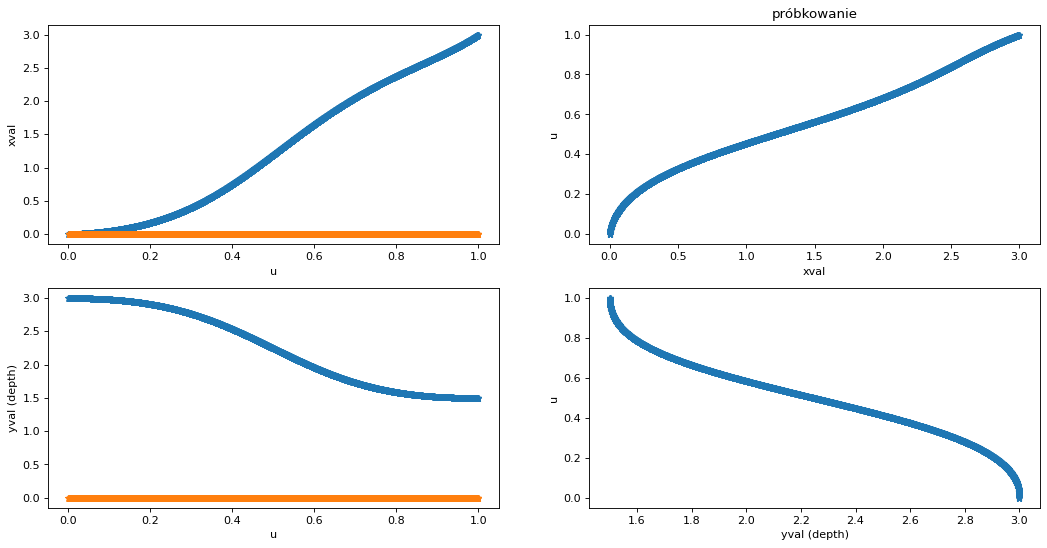

In [2]:
dxval = numpy.asarray([0] + [xval[n]-xval[n-1] for n in range(1, len(xval))])
dyval = numpy.asarray([0] + [yval[n]-yval[n-1] for n in range(1, len(yval))])

plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plt.plot(bnd, xval, marker='*')
plt.plot(bnd[1:], dxval[1:], marker='*')
plt.xlabel('u')
plt.ylabel('xval')

plt.subplot(2, 2, 2)
plt.title('próbkowanie')
plt.plot(xval, bnd, marker='*')
plt.xlabel('xval')
plt.ylabel('u')

plt.subplot(2, 2, 3)
plt.plot(bnd, yval, marker='*')
plt.plot(bnd, dyval, marker='*')
plt.xlabel('u')
plt.ylabel('yval (depth)')

plt.subplot(2, 2, 4)
plt.plot(yval, bnd, marker='*')
plt.xlabel('yval (depth)')
plt.ylabel('u')

# todo: evaluacja przez transpozycję rzutu z głębią